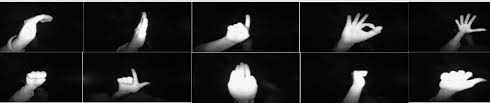

Hand gesture recognition database is presented, composed by a set of near infrared images acquired by the Leap Motion sensor.

The database is composed by 5 different hand-gestures (showed above) that were performed by 10 different subjects (5 men and 5 women).
<br>

The database is structured in different folders as:
<br>
/00 (subject with identifier 00)<br>
/01_palm (images for palm gesture of subject 00 )<br>
/01_palm/frame_197957_r.png,…,frame_198136_l.png, … (images that corresponds to different samples obtained for the palm gesture performed by the subject with identifier 00)<br>
/02_l (images for l gesture of subject 00 )<br>
'03_fist'<br>
'04_fist_moved'<br>
'05_thumb'<br>
/01<br>
/02<br>
/09 (last subject with identifier 09)

# 📌Importing Libaraies 

In [15]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import random
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.math import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
tf.random.set_seed(3)
import glob 
import skimage as oi
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, LeakyReLU


#  Loading The Data

In [16]:
folders_names = []
##'/kaggle/input/leapgestrecog/leapGestRecog/0'
for i in range(10):
    folder = r"C:\Users\samri\Downloads\internship\Task 4\archive\leapGestRecog\0{}".format(i)
    folders_names.append(folder)

files_names = ['01_palm', '02_l', '03_fist', '04_fist_moved', '05_thumb']


In [17]:
folders_names

['C:\\Users\\samri\\Downloads\\internship\\Task 4\\archive\\leapGestRecog\\00',
 'C:\\Users\\samri\\Downloads\\internship\\Task 4\\archive\\leapGestRecog\\01',
 'C:\\Users\\samri\\Downloads\\internship\\Task 4\\archive\\leapGestRecog\\02',
 'C:\\Users\\samri\\Downloads\\internship\\Task 4\\archive\\leapGestRecog\\03',
 'C:\\Users\\samri\\Downloads\\internship\\Task 4\\archive\\leapGestRecog\\04',
 'C:\\Users\\samri\\Downloads\\internship\\Task 4\\archive\\leapGestRecog\\05',
 'C:\\Users\\samri\\Downloads\\internship\\Task 4\\archive\\leapGestRecog\\06',
 'C:\\Users\\samri\\Downloads\\internship\\Task 4\\archive\\leapGestRecog\\07',
 'C:\\Users\\samri\\Downloads\\internship\\Task 4\\archive\\leapGestRecog\\08',
 'C:\\Users\\samri\\Downloads\\internship\\Task 4\\archive\\leapGestRecog\\09']

### Display 3 images for each file from eav=ch class

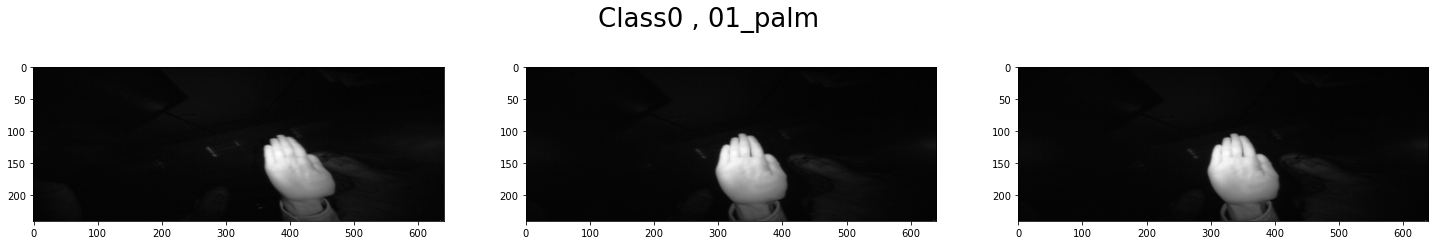

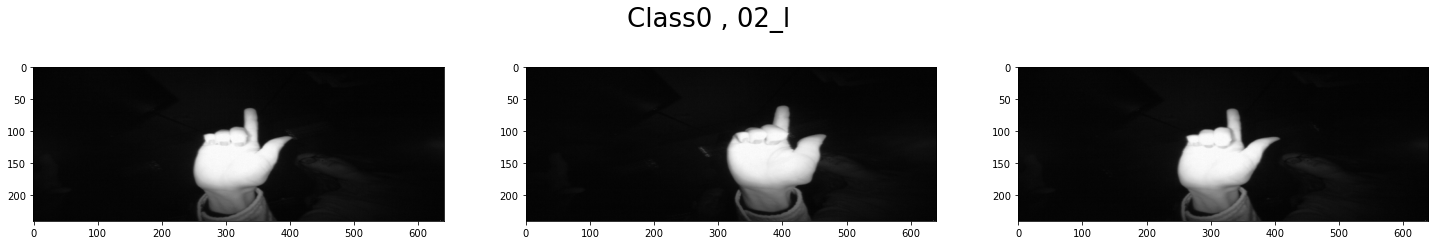

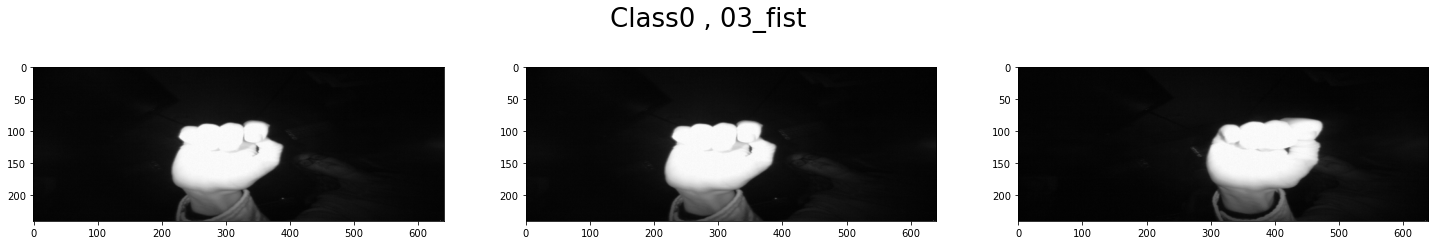

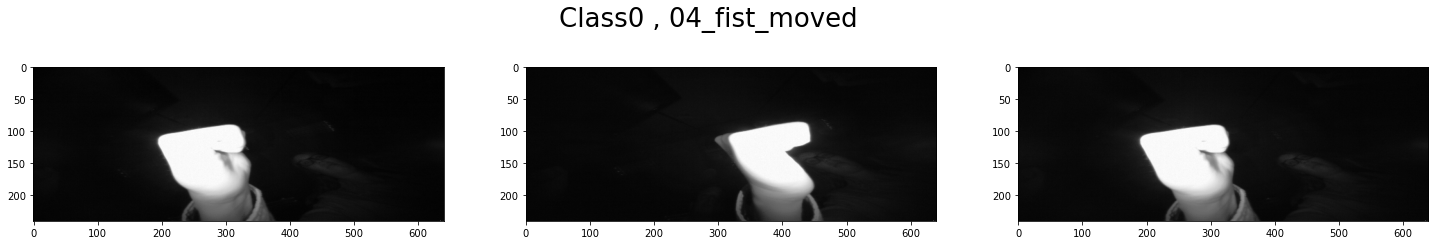

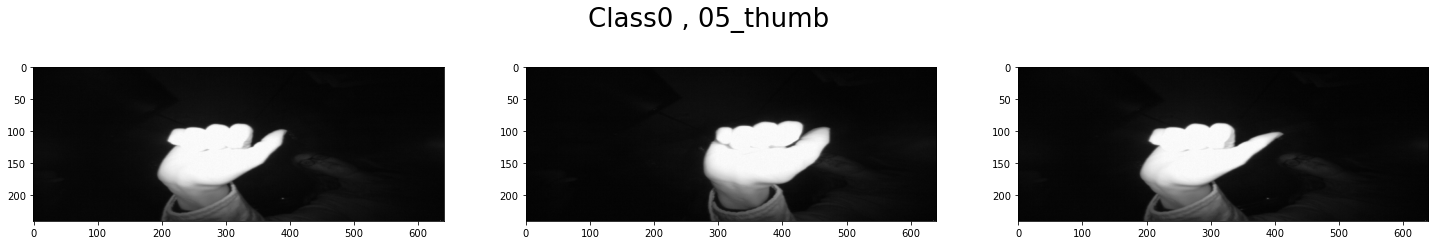

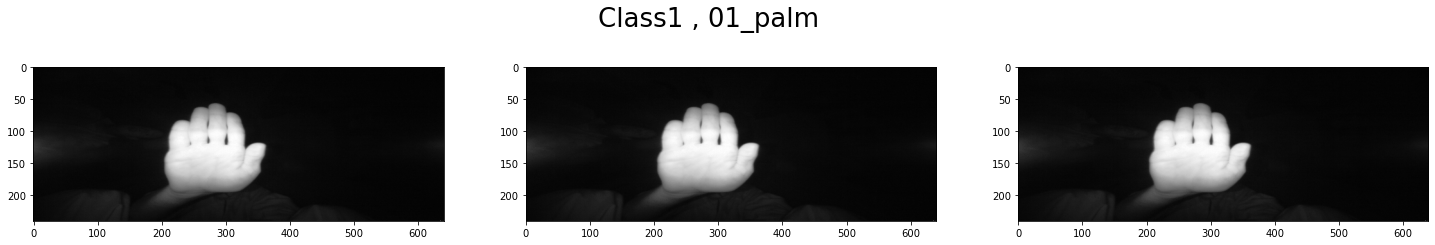

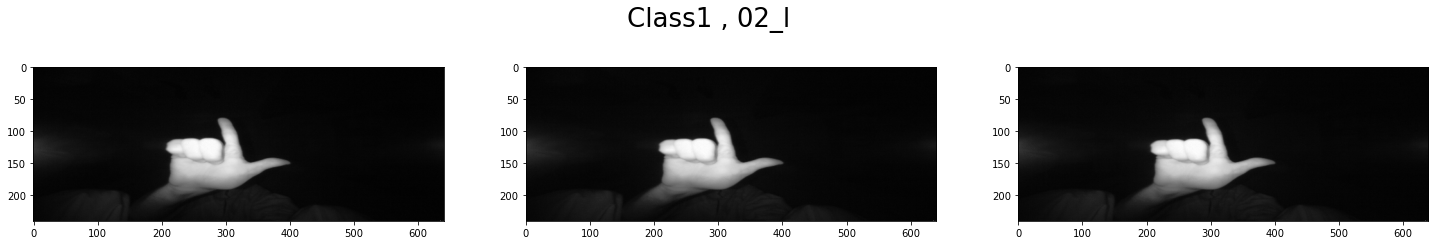

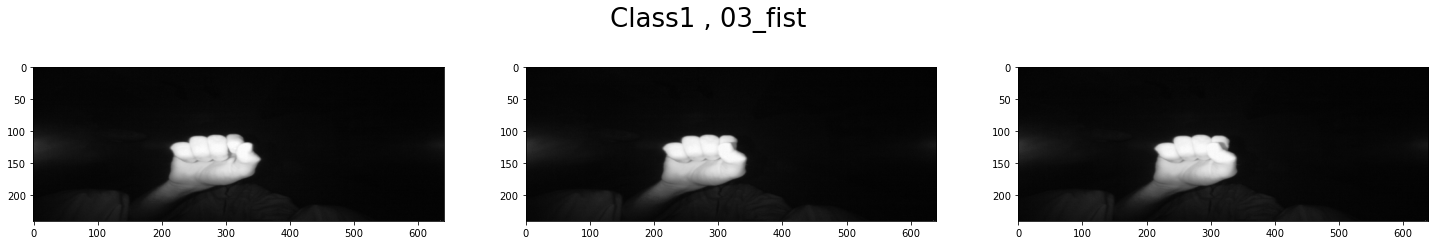

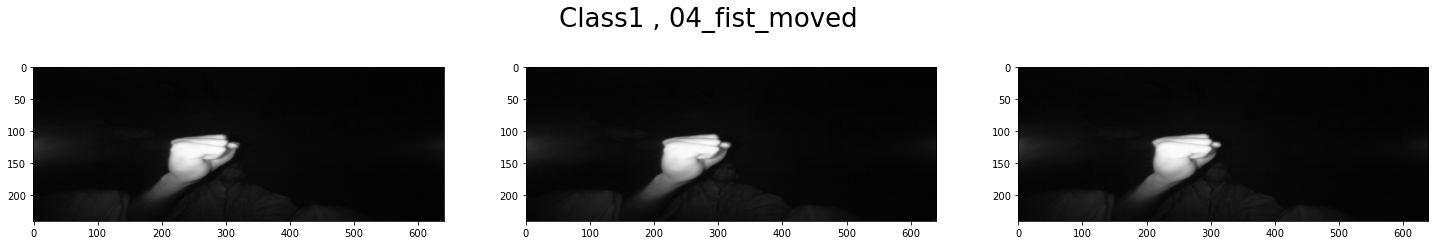

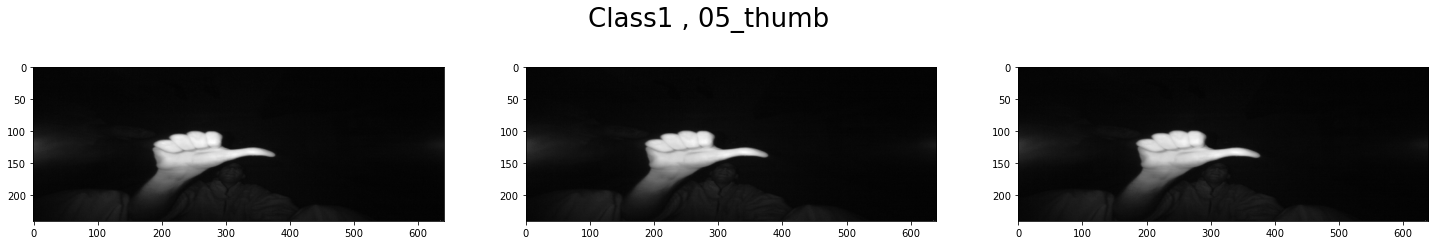

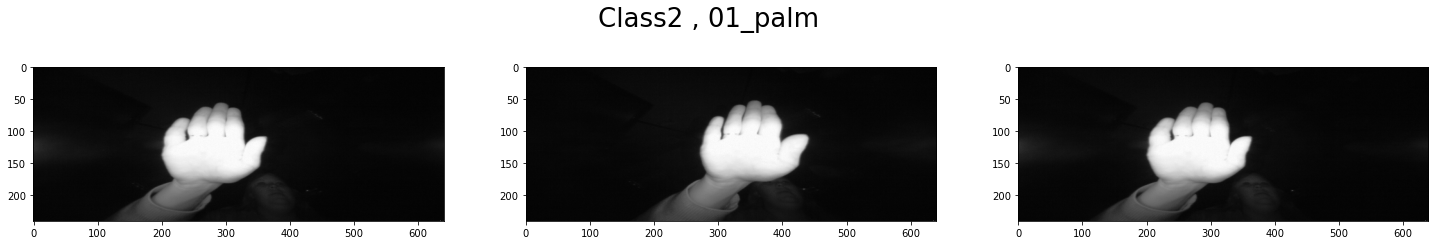

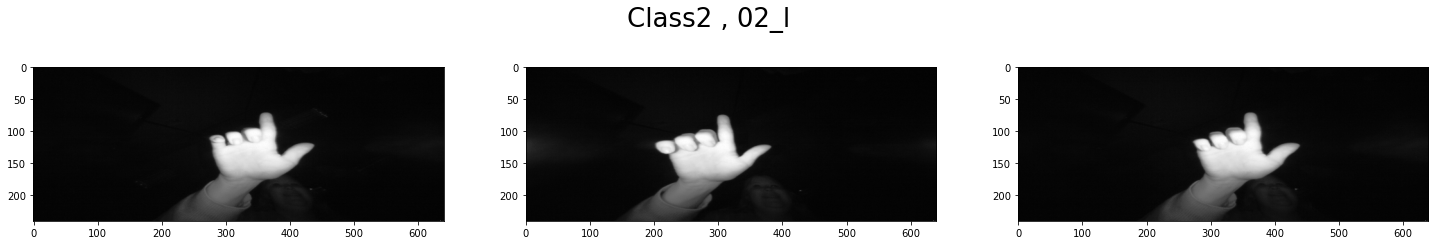

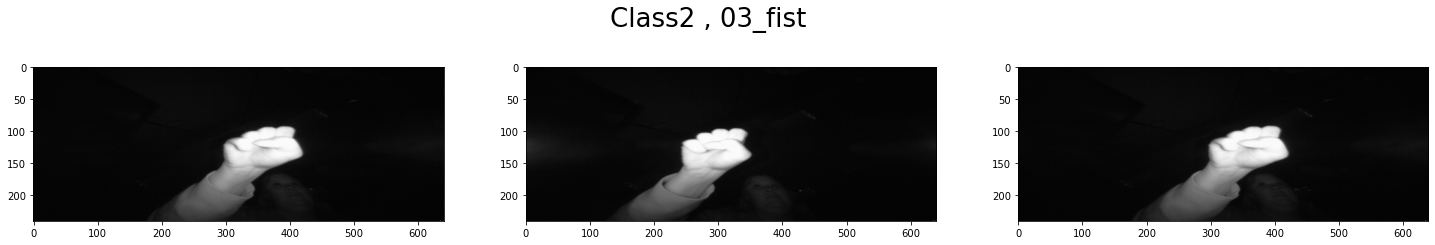

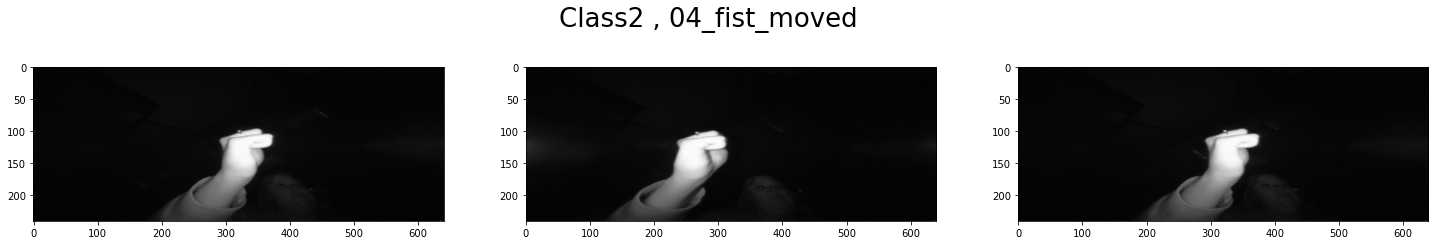

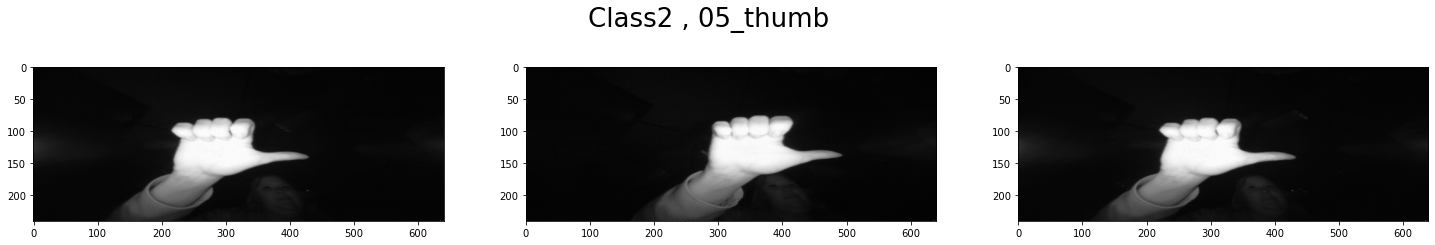

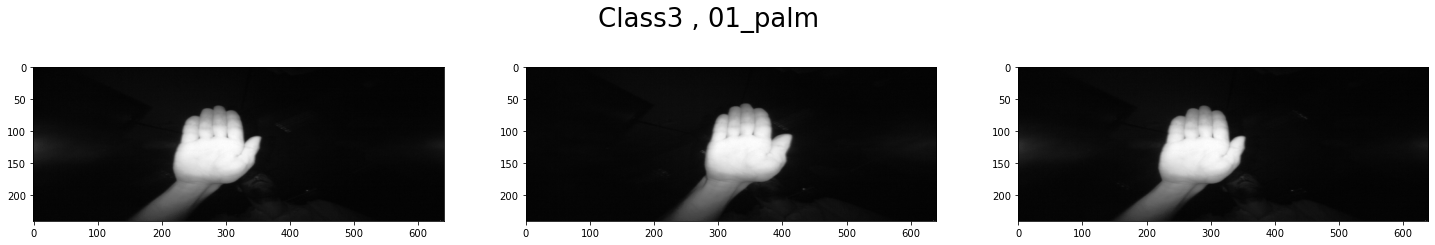

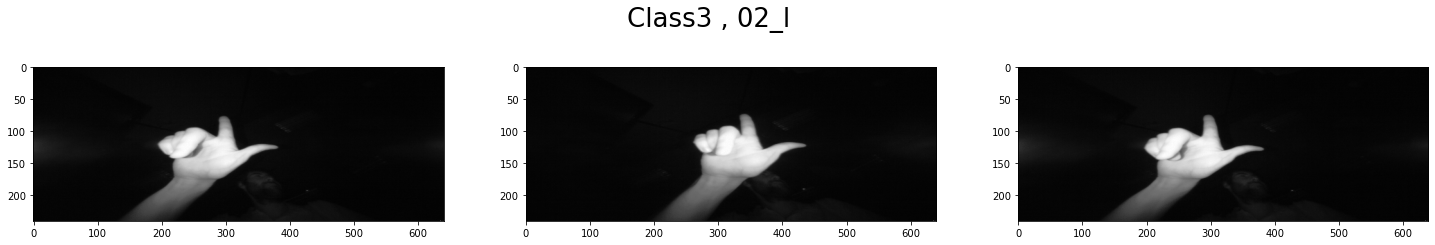

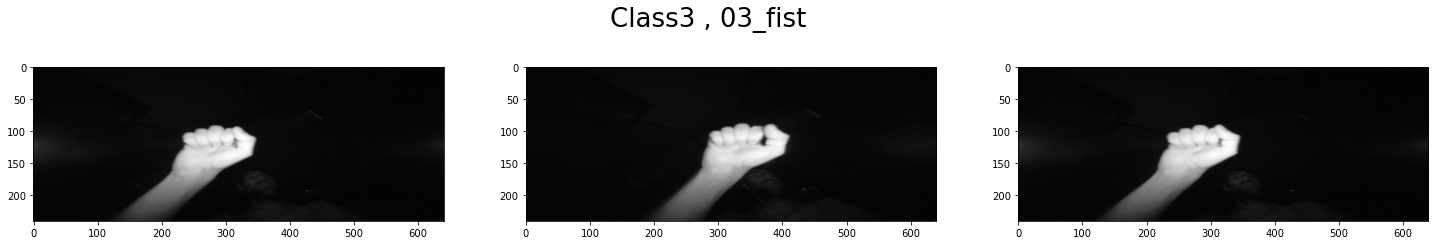

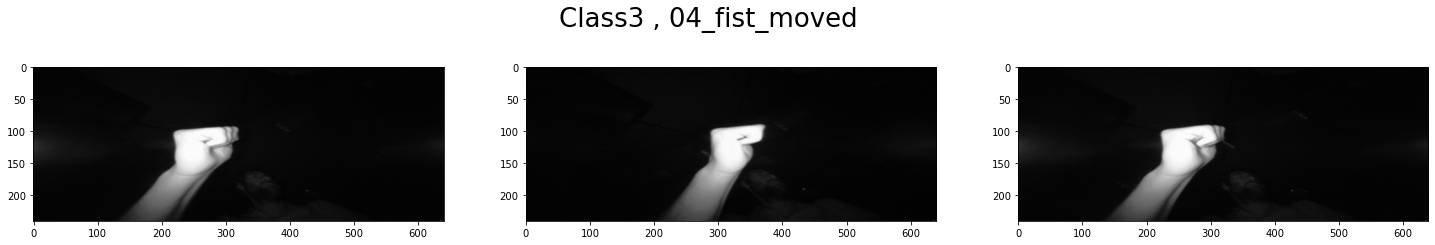

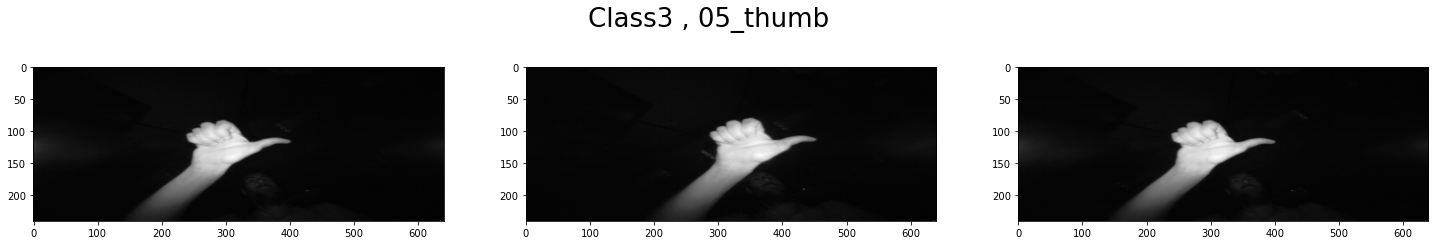

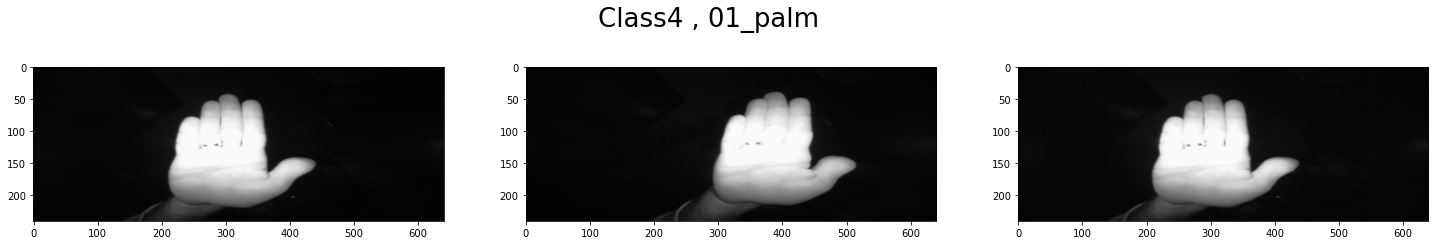

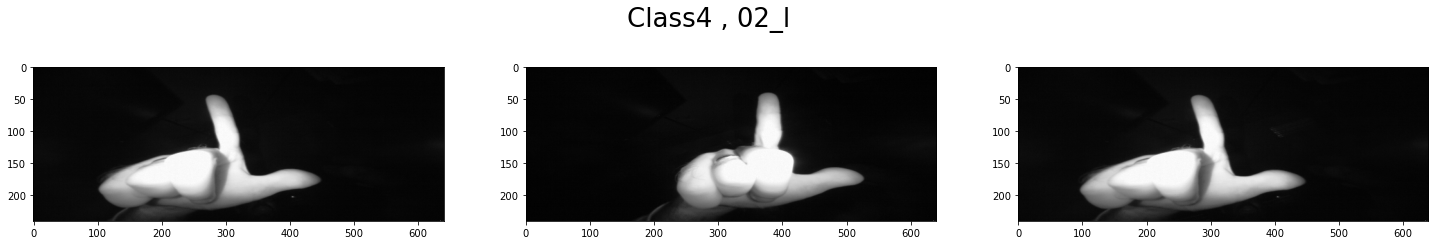

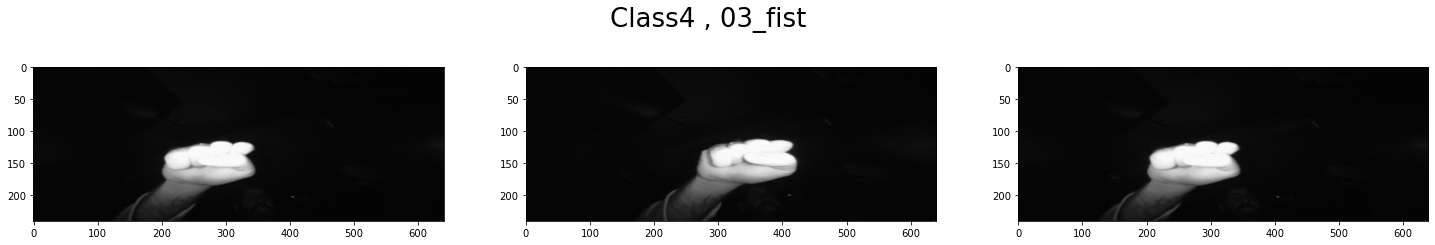

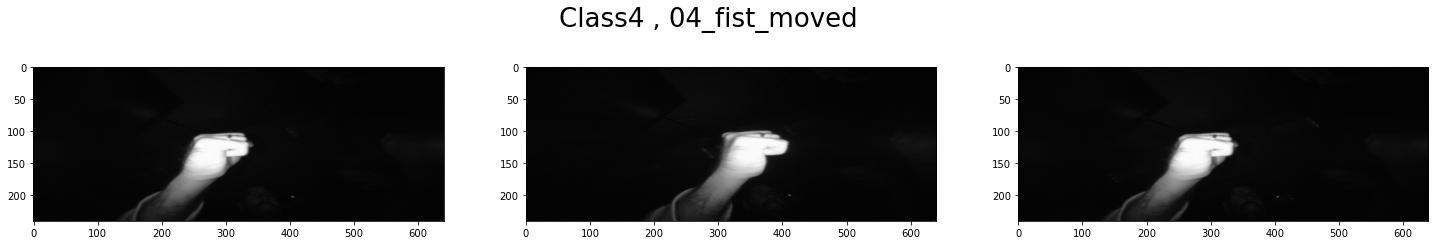

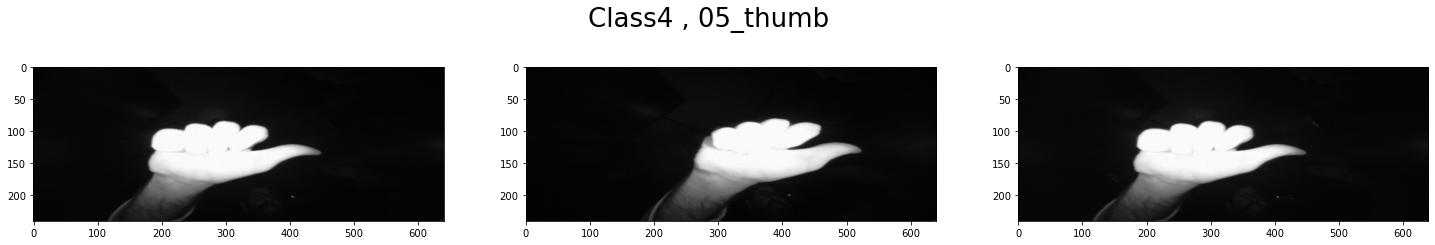

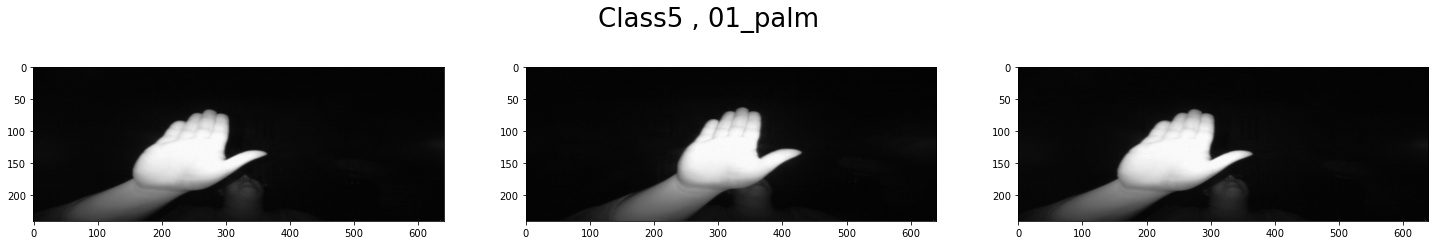

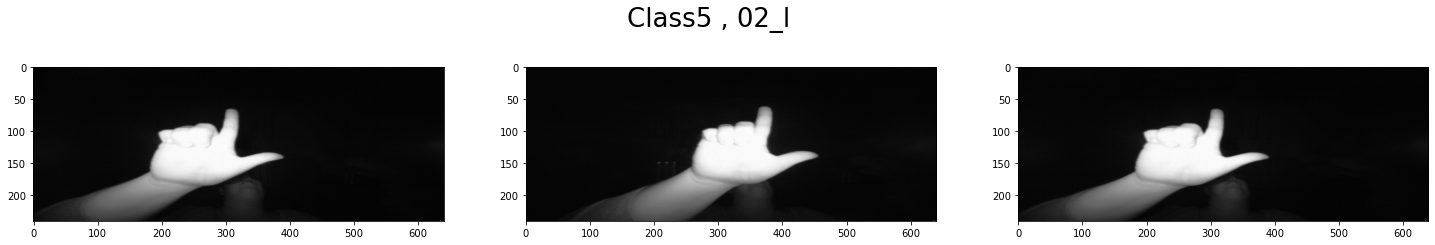

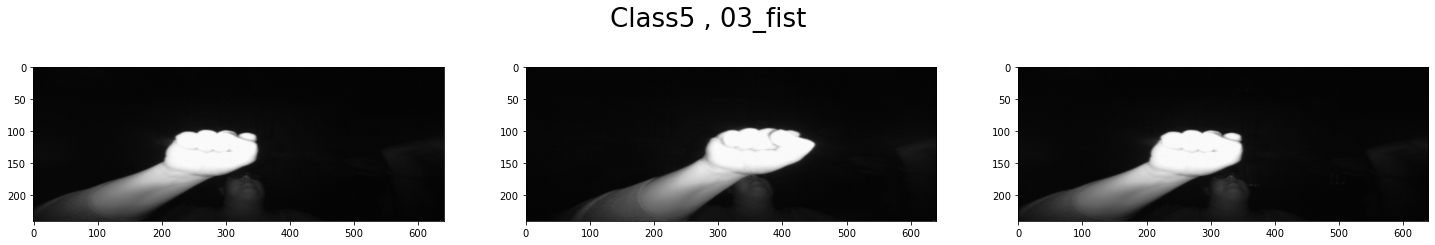

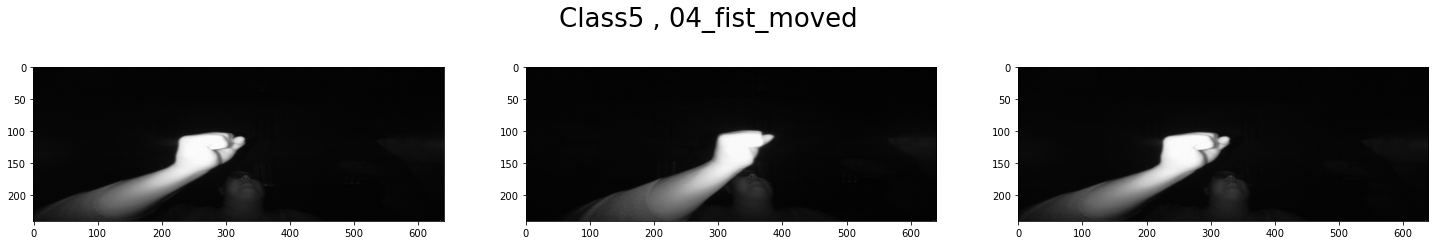

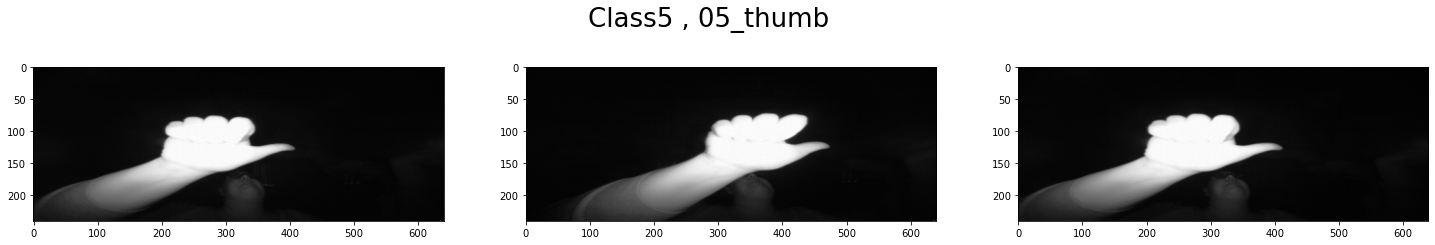

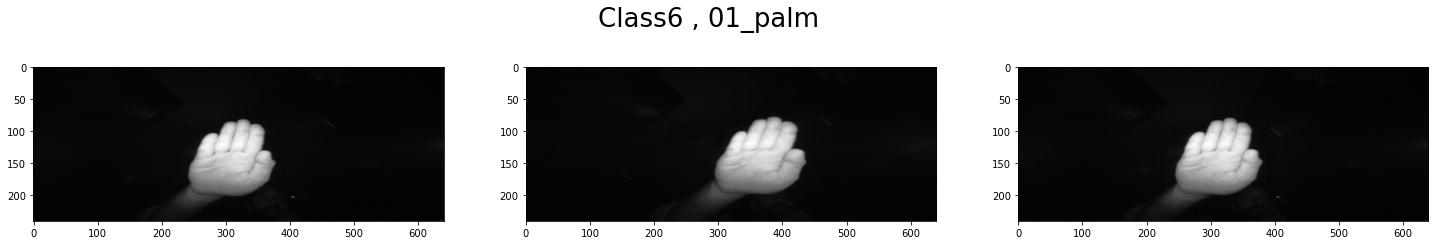

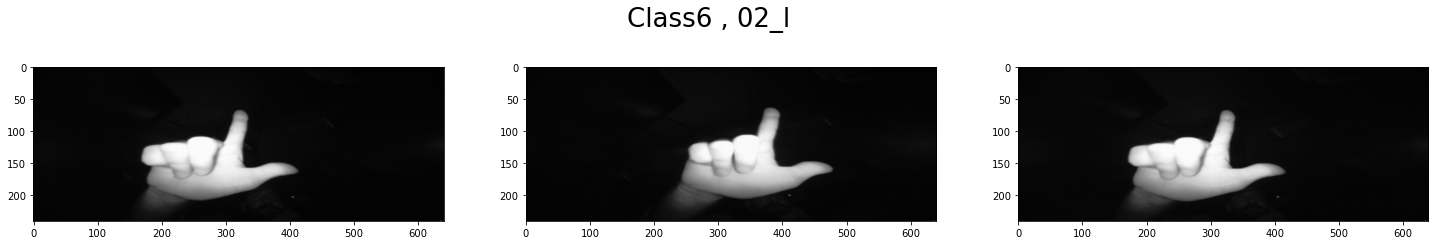

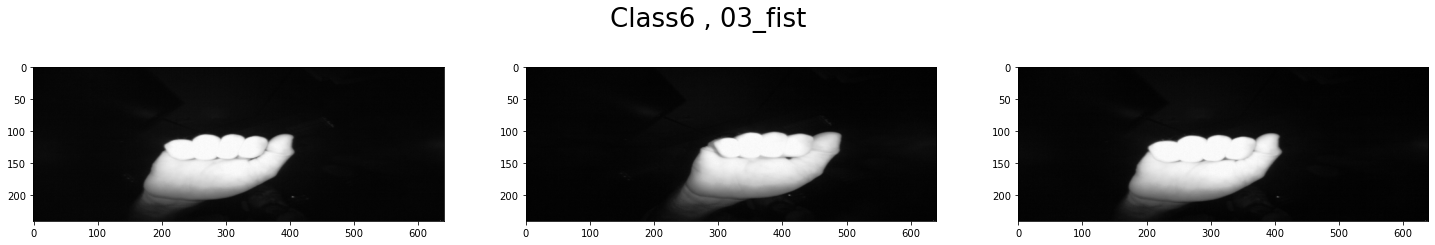

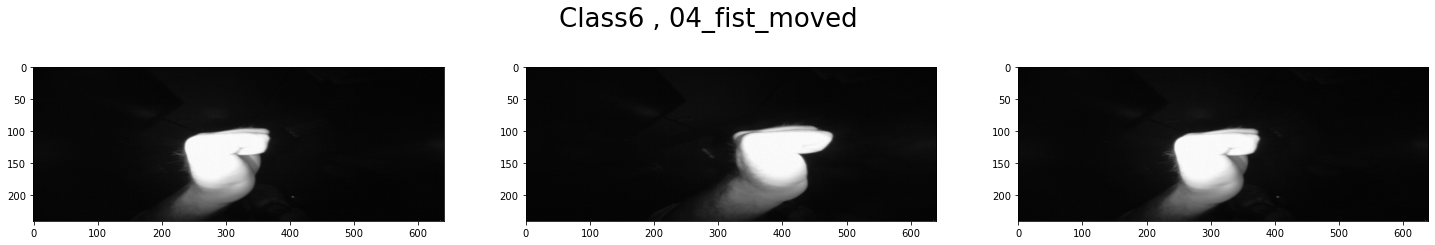

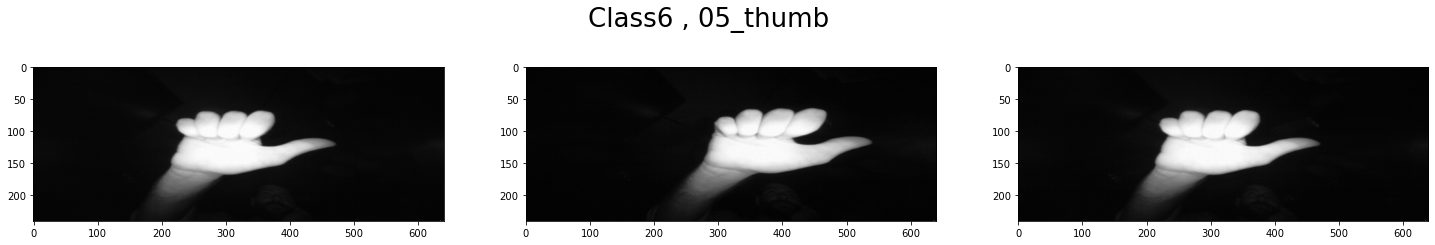

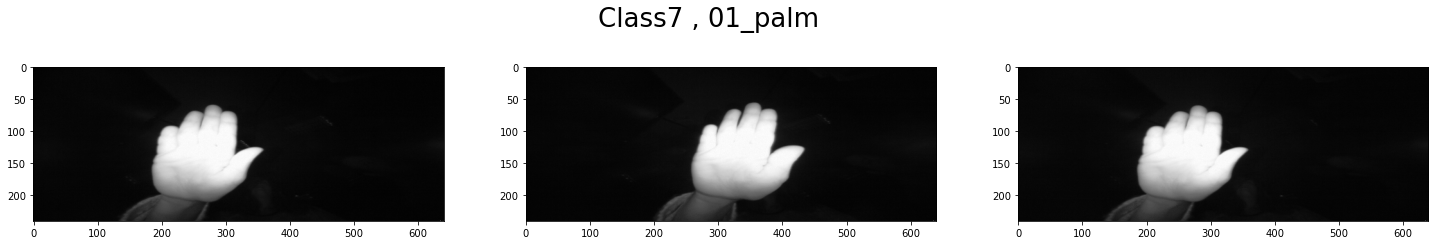

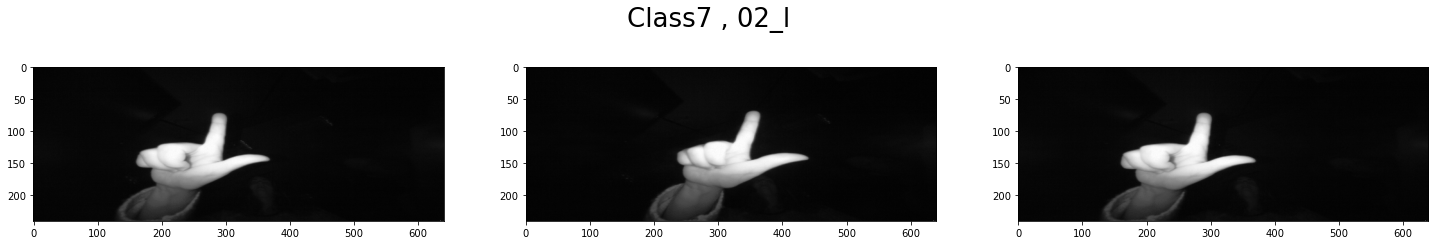

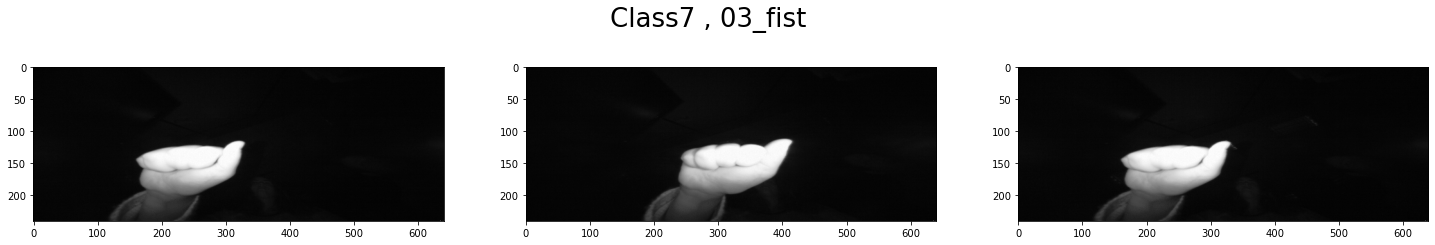

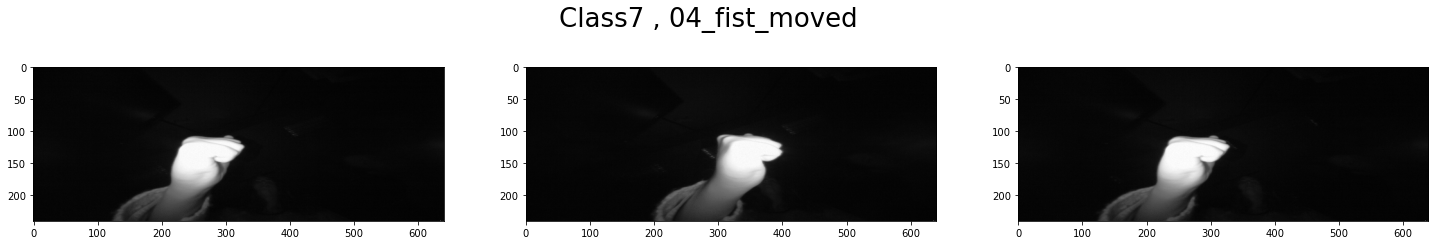

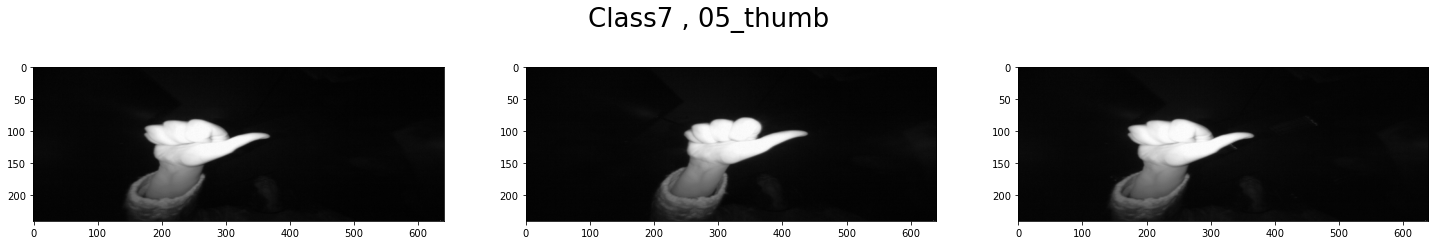

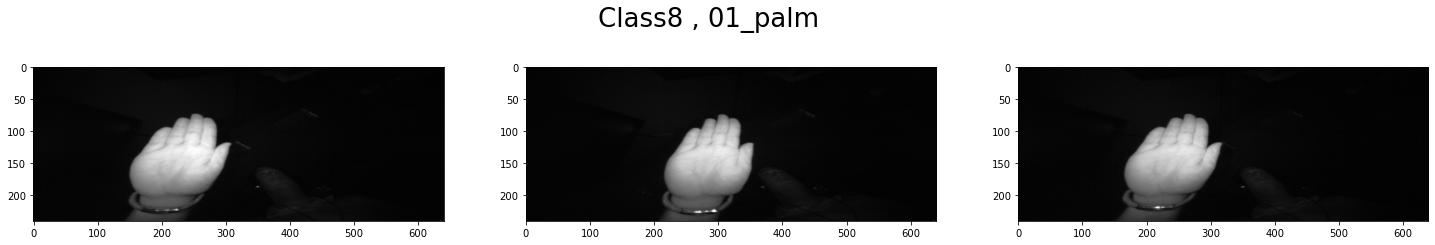

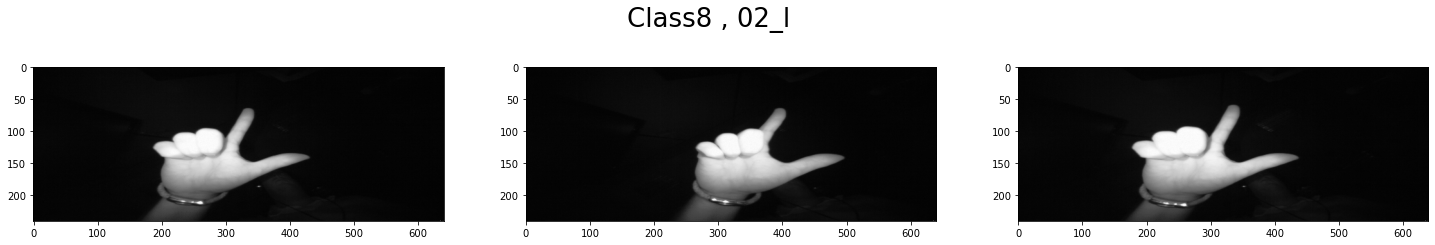

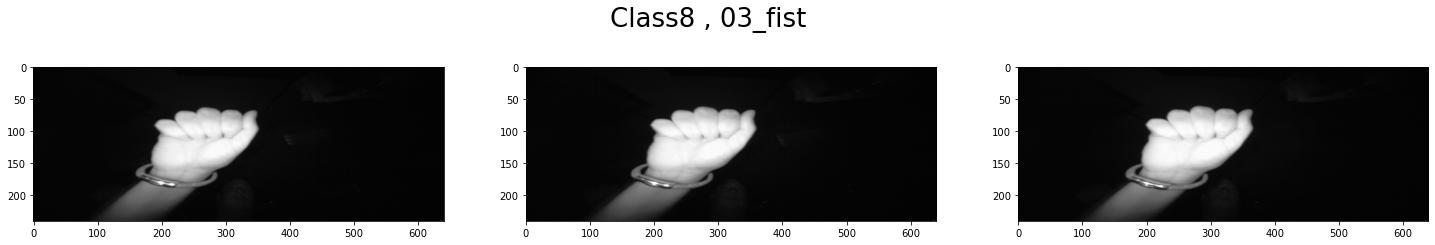

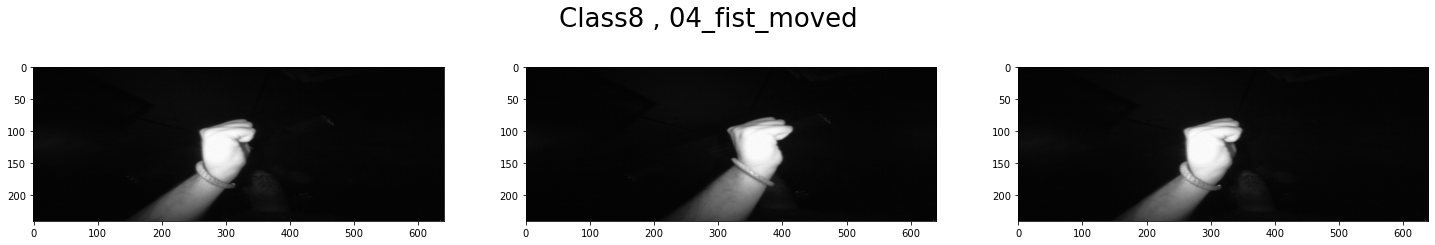

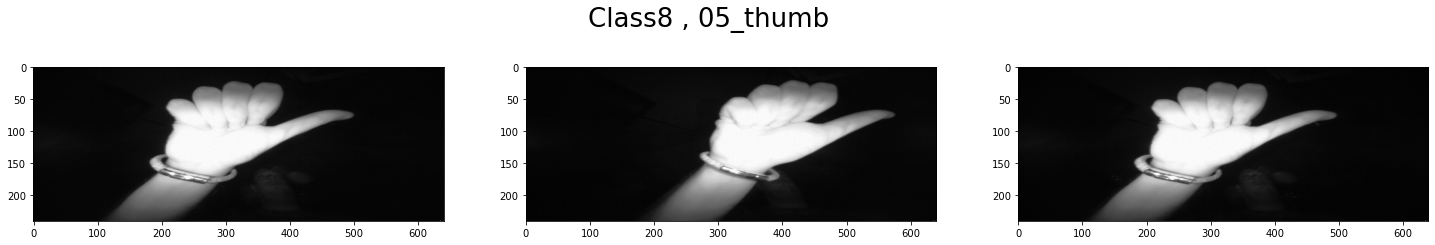

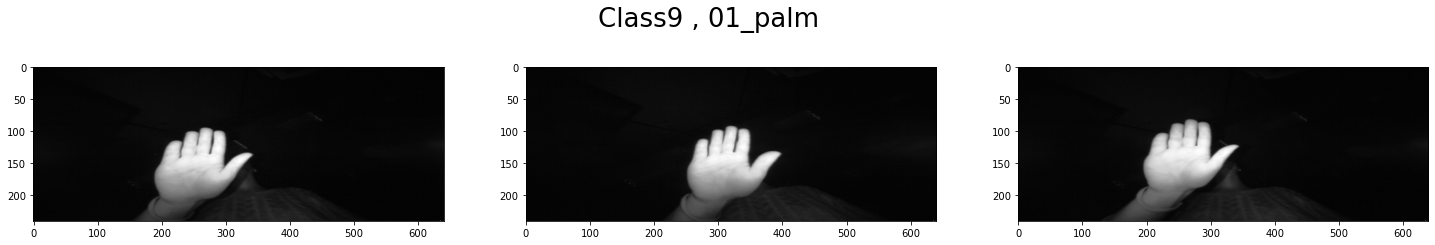

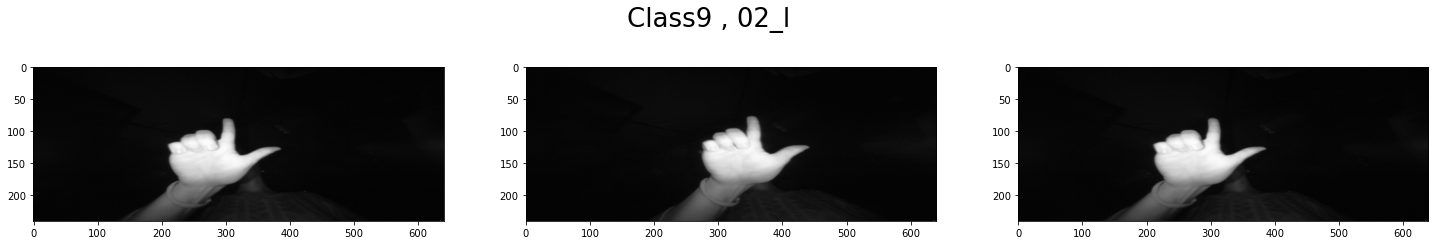

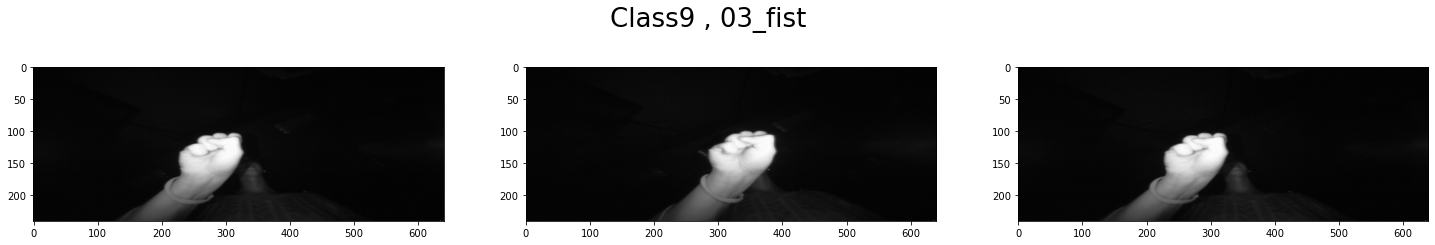

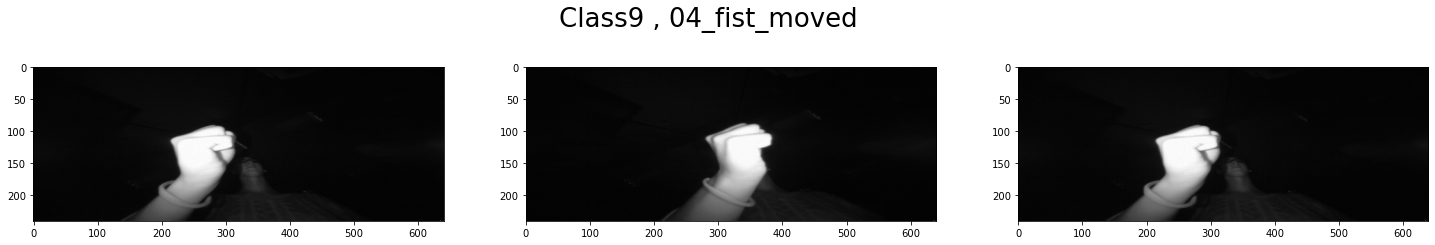

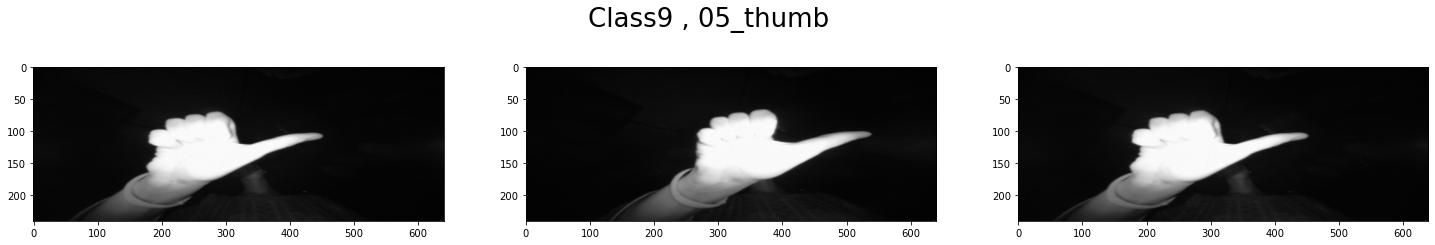

In [18]:
for folder in folders_names:
        Class_num=folder[-1]
        for file in files_names:
            path = os.path.join(folder, file)
            x=0
            fig, axes = plt.subplots(1,3, figsize=(25, 4))  
            for img in os.listdir(path):
                
                
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                axes[x].imshow(img_array, cmap='gray')
                x += 1
                if x == 3: 
                    break

            plt.suptitle(f"Class{Class_num} , {file}", fontsize=26)
            plt.show()

In [19]:
training_data = []

def create_training_data():
    for folder in folders_names:
        Class_num=folder[-1]
        print('Class ' ,Class_num)
        for file in files_names:
            path = os.path.join(folder, file)

            print('Class ' ,Class_num,file)
#             c=0
            
            for img in tqdm(os.listdir(path)):
#                 if(c==100):
#                     break
#                 c+=1
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                
          
                training_data.append([img_array,int(Class_num)])
                        
    
create_training_data()        

Class  0
Class  0 01_palm


100%|██████████| 200/200 [00:02<00:00, 80.66it/s]


Class  0 02_l


100%|██████████| 200/200 [00:02<00:00, 81.85it/s]


Class  0 03_fist


100%|██████████| 200/200 [00:02<00:00, 90.51it/s] 


Class  0 04_fist_moved


100%|██████████| 200/200 [00:02<00:00, 80.05it/s]


Class  0 05_thumb


100%|██████████| 200/200 [00:02<00:00, 79.37it/s]


Class  1
Class  1 01_palm


100%|██████████| 200/200 [00:02<00:00, 81.55it/s]


Class  1 02_l


100%|██████████| 200/200 [00:02<00:00, 81.53it/s]


Class  1 03_fist


100%|██████████| 200/200 [00:02<00:00, 80.64it/s]


Class  1 04_fist_moved


100%|██████████| 200/200 [00:02<00:00, 81.37it/s]


Class  1 05_thumb


100%|██████████| 200/200 [00:02<00:00, 83.55it/s]


Class  2
Class  2 01_palm


100%|██████████| 200/200 [00:02<00:00, 78.57it/s]


Class  2 02_l


100%|██████████| 200/200 [00:02<00:00, 81.12it/s]


Class  2 03_fist


100%|██████████| 200/200 [00:02<00:00, 79.53it/s]


Class  2 04_fist_moved


100%|██████████| 200/200 [00:02<00:00, 83.43it/s]


Class  2 05_thumb


100%|██████████| 200/200 [00:02<00:00, 80.41it/s]


Class  3
Class  3 01_palm


100%|██████████| 200/200 [00:02<00:00, 87.91it/s]


Class  3 02_l


100%|██████████| 200/200 [00:02<00:00, 82.31it/s]


Class  3 03_fist


100%|██████████| 200/200 [00:02<00:00, 77.54it/s]


Class  3 04_fist_moved


100%|██████████| 200/200 [00:02<00:00, 80.29it/s]


Class  3 05_thumb


100%|██████████| 200/200 [00:02<00:00, 77.86it/s]


Class  4
Class  4 01_palm


100%|██████████| 200/200 [00:02<00:00, 79.97it/s]


Class  4 02_l


100%|██████████| 200/200 [00:02<00:00, 79.33it/s]


Class  4 03_fist


100%|██████████| 200/200 [00:02<00:00, 80.72it/s]


Class  4 04_fist_moved


100%|██████████| 200/200 [00:02<00:00, 77.79it/s]


Class  4 05_thumb


100%|██████████| 200/200 [00:02<00:00, 72.01it/s]


Class  5
Class  5 01_palm


100%|██████████| 200/200 [00:02<00:00, 80.10it/s]


Class  5 02_l


100%|██████████| 200/200 [00:02<00:00, 85.95it/s]


Class  5 03_fist


100%|██████████| 200/200 [00:02<00:00, 83.41it/s]


Class  5 04_fist_moved


100%|██████████| 200/200 [00:02<00:00, 89.16it/s] 


Class  5 05_thumb


100%|██████████| 200/200 [00:02<00:00, 84.25it/s]


Class  6
Class  6 01_palm


100%|██████████| 200/200 [00:02<00:00, 76.30it/s]


Class  6 02_l


100%|██████████| 200/200 [00:02<00:00, 84.90it/s]


Class  6 03_fist


100%|██████████| 200/200 [00:02<00:00, 81.83it/s]


Class  6 04_fist_moved


100%|██████████| 200/200 [00:02<00:00, 83.18it/s]


Class  6 05_thumb


100%|██████████| 200/200 [00:02<00:00, 85.15it/s]


Class  7
Class  7 01_palm


100%|██████████| 200/200 [00:02<00:00, 81.24it/s]


Class  7 02_l


100%|██████████| 200/200 [00:02<00:00, 81.59it/s]


Class  7 03_fist


100%|██████████| 200/200 [00:02<00:00, 83.04it/s]


Class  7 04_fist_moved


100%|██████████| 200/200 [00:02<00:00, 79.68it/s]


Class  7 05_thumb


100%|██████████| 200/200 [00:02<00:00, 77.73it/s]


Class  8
Class  8 01_palm


100%|██████████| 200/200 [00:02<00:00, 84.63it/s]


Class  8 02_l


100%|██████████| 200/200 [00:02<00:00, 84.24it/s]


Class  8 03_fist


100%|██████████| 200/200 [00:02<00:00, 80.99it/s]


Class  8 04_fist_moved


100%|██████████| 200/200 [00:02<00:00, 81.78it/s]


Class  8 05_thumb


100%|██████████| 200/200 [00:02<00:00, 80.94it/s]


Class  9
Class  9 01_palm


100%|██████████| 200/200 [00:02<00:00, 77.68it/s]


Class  9 02_l


100%|██████████| 200/200 [00:02<00:00, 83.77it/s]


Class  9 03_fist


100%|██████████| 200/200 [00:02<00:00, 85.18it/s]


Class  9 04_fist_moved


100%|██████████| 200/200 [00:02<00:00, 77.48it/s]


Class  9 05_thumb


100%|██████████| 200/200 [00:02<00:00, 80.68it/s]


# Sizes of images

###  printing the shape of the first image from each class

In [20]:
for folder in folders_names:
    class_num = folder[-1]
    print('Class', class_num)
    for file in files_names:
        path = os.path.join(folder, file)
       
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            print("Image shape:", img_array.shape,"\n")
            break  # To print only the first image shape for each file
        break  # To print only the first file shape for each folder


Class 0
Image shape: (240, 640) 

Class 1
Image shape: (240, 640) 

Class 2
Image shape: (240, 640) 

Class 3
Image shape: (240, 640) 

Class 4
Image shape: (240, 640) 

Class 5
Image shape: (240, 640) 

Class 6
Image shape: (240, 640) 

Class 7
Image shape: (240, 640) 

Class 8
Image shape: (240, 640) 

Class 9
Image shape: (240, 640) 



###  Checking if all images have the same size or not

In [21]:
def check_image_sizes():
    first_img_shape = None
    for folder in folders_names:
        for file in files_names:
            path = os.path.join(folder, file)
            for img in os.listdir(path):
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                if first_img_shape is None:
                    first_img_shape = img_array.shape
                elif img_array.shape != first_img_shape:
                    print("Image sizes are not consistent.")
                    return False
    print("All images have the same size:", first_img_shape)
   
check_image_sizes()


All images have the same size: (240, 640)


# Shuffling

### getting the classes of the first 5 images

In [22]:
for i in range(5):
    print("Class number for image", i+1, ":", training_data[i][1])

Class number for image 1 : 0
Class number for image 2 : 0
Class number for image 3 : 0
Class number for image 4 : 0
Class number for image 5 : 0


### getting the classes of the lastt 5 images

In [23]:
for i in range(-1, -6, -1):
    print("Class number for image", len(training_data) + i + 1, ":", training_data[i][1])

Class number for image 10000 : 9
Class number for image 9999 : 9
Class number for image 9998 : 9
Class number for image 9997 : 9
Class number for image 9996 : 9


### Suffling and display the first 10 classes after suffling

In [24]:
random.shuffle(training_data)

for i in range(15):
    print(f"Sample {i+1}:")
    print("Class number:", training_data[i][1],"\n") 

Sample 1:
Class number: 1 

Sample 2:
Class number: 8 

Sample 3:
Class number: 9 

Sample 4:
Class number: 9 

Sample 5:
Class number: 9 

Sample 6:
Class number: 3 

Sample 7:
Class number: 2 

Sample 8:
Class number: 3 

Sample 9:
Class number: 8 

Sample 10:
Class number: 8 

Sample 11:
Class number: 8 

Sample 12:
Class number: 4 

Sample 13:
Class number: 5 

Sample 14:
Class number: 8 

Sample 15:
Class number: 4 



# Preprocessing

### Feature Selection

In [25]:
X=[]
y=[]

for feature,label in training_data:
    X.append(feature)
    y.append(label)


In [26]:
print(type(X))
print(type(y))


<class 'list'>
<class 'list'>


### Convert X ,y from list to numpy array

In [27]:
X=np.array(X)
y=np.array(y)
print(X.shape)
print(y.shape)

(10000, 240, 640)
(10000,)


### Spliting the Data

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8000, 240, 640)
(8000,)
(2000, 240, 640)
(2000,)


### Getting classes names

In [29]:
print(np.unique(y_train))

print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


### Scalling the Data

In [30]:
X_train = X_train/255
X_test = X_test/255

### print first image after scalling 

In [31]:
print(X_train[0])

[[0.01960784 0.01960784 0.01568627 ... 0.01960784 0.01568627 0.01960784]
 [0.02352941 0.01568627 0.01176471 ... 0.01960784 0.01176471 0.01568627]
 [0.01568627 0.01960784 0.01960784 ... 0.01960784 0.00784314 0.01568627]
 ...
 [0.01960784 0.01960784 0.02352941 ... 0.01176471 0.01176471 0.01568627]
 [0.01960784 0.02352941 0.01960784 ... 0.01176471 0.01568627 0.01960784]
 [0.02352941 0.01960784 0.01960784 ... 0.09803922 0.04705882 0.0627451 ]]


# 📌Modeling Time

### Building Multi Neural Network

In [32]:

model = Sequential([
    Flatten(input_shape=(240, 640)),
#     Dense(1024),
#     LeakyReLU(alpha=0.1),
#     Dense(512),
#     LeakyReLU(alpha=0.1),
#     Dense(256),
#     LeakyReLU(alpha=0.1),
#     Dense(128),
#     LeakyReLU(alpha=0.1),
    Dense(64),
    LeakyReLU(alpha=0.1),
    Dense(32),
    LeakyReLU(alpha=0.1),
    Dense(16),
    LeakyReLU(alpha=0.1),
    Dense(10, activation='softmax')
])

C:\Users\samri\anaconda3\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\samri\anaconda3\lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


### Compiling the model

In [33]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Training the Neural Network

In [38]:
X_train_small = X_train[:1000]
y_train_small = y_train[:1000]

history = model.fit(X_train_small, y_train_small, epochs=3, validation_split=0.1, batch_size=16, verbose=2)

Epoch 1/3
57/57 - 9s - 150ms/step - accuracy: 0.2367 - loss: 3.1408 - val_accuracy: 0.4300 - val_loss: 1.7245
Epoch 2/3
57/57 - 5s - 87ms/step - accuracy: 0.5600 - loss: 1.3694 - val_accuracy: 0.6700 - val_loss: 1.1601
Epoch 3/3
57/57 - 5s - 89ms/step - accuracy: 0.7711 - loss: 0.7622 - val_accuracy: 0.8000 - val_loss: 0.8072


###  Model Summary

In [39]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 153600)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     9,830,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,499,728 (112.53 MB)

 Trainable params: 9,833,242 (37.51 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 19,666,486 (75.02 MB)

# 📌Evaluation time

### Training Loss

In [41]:
loss, accuracy = model.evaluate(X_train_small, y_train_small)
print(f"Training Loss: {loss:.4f}")
print(f"Training Accuracy: {accuracy*100:.2f}%")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8255 - loss: 0.6894
Training Loss: 0.6779
Training Accuracy: 83.10%


### Testing Loss

In [45]:
subset_size = 100  # or any other size that fits into memory
X_test_subset = X_test[:subset_size]
y_test_subset = y_test[:subset_size]

# Evaluate the model on the subset
loss, accuracy = model.evaluate(X_test_subset, y_test_subset)
print(f"Testing Loss: {loss:.4f}")
print(f"Testing Accuracy: {accuracy*100:.2f}%")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8120 - loss: 0.8245
Testing Loss: 0.7848
Testing Accuracy: 84.00%


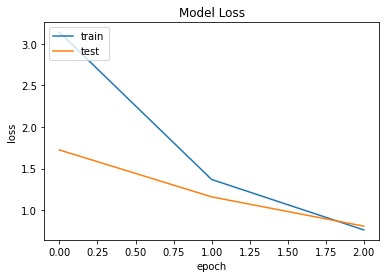

In [46]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

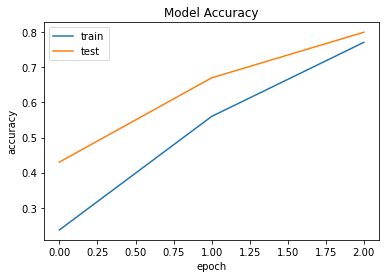

In [47]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

###   Prediction

In [49]:
y_pred=model.predict(X_test_subset)
print(y_pred[0])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[0.60831904 0.09019458 0.00443228 0.00076788 0.03922594 0.03287484
 0.11944091 0.01839022 0.01235324 0.07400104]


In [50]:
y_pred = [np.argmax(i) for i in y_pred]
print(y_pred[1])

3


### y_test Vs y_pred

In [51]:
comparison_df = pd.DataFrame({ 'Actual': y_test_subset,'Predicted': y_pred})

print(comparison_df[:20])

    Actual  Predicted
0        0          0
1        3          3
2        3          2
3        9          9
4        2          2
5        6          6
6        8          0
7        4          4
8        9          9
9        2          2
10       1          1
11       4          4
12       1          1
13       8          8
14       9          9
15       3          3
16       7          7
17       9          9
18       9          0
19       6          0


###  Confusion Matrix

In [53]:
conf_mat = confusion_matrix(y_test_subset, y_pred)
print(conf_mat)

tf.Tensor(
[[ 9  0  0  0  0  0  0  0  0  0]
 [ 0  8  0  0  0  0  0  0  0  0]
 [ 0  0 12  0  0  0  0  0  0  0]
 [ 0  0  3  5  0  0  0  0  0  0]
 [ 0  0  0  0 12  0  0  1  0  0]
 [ 0  0  0  0  0 12  0  0  0  0]
 [ 2  0  0  0  0  0  3  0  0  0]
 [ 0  0  3  1  1  0  0  6  0  0]
 [ 2  0  0  0  1  0  0  1  3  0]
 [ 1  0  0  0  0  0  0  0  0 14]], shape=(10, 10), dtype=int32)


Text(0.5, 42.0, 'Predicted Labels')

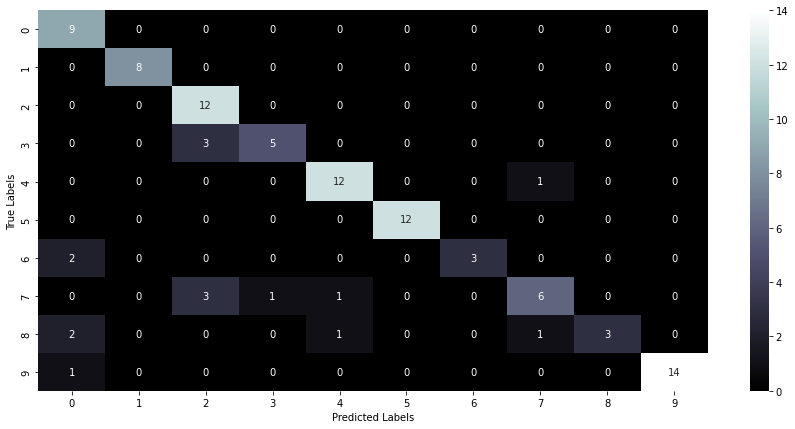

In [54]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='bone')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

###  Classification Report 

In [56]:
from sklearn.metrics import classification_report

print(classification_report(y_test_subset,y_pred))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78         9
           1       1.00      1.00      1.00         8
           2       0.67      1.00      0.80        12
           3       0.83      0.62      0.71         8
           4       0.86      0.92      0.89        13
           5       1.00      1.00      1.00        12
           6       1.00      0.60      0.75         5
           7       0.75      0.55      0.63        11
           8       1.00      0.43      0.60         7
           9       1.00      0.93      0.97        15

    accuracy                           0.84       100
   macro avg       0.88      0.81      0.81       100
weighted avg       0.87      0.84      0.83       100

